In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [3]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_religious_affimiliation.csv")

In [4]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")

In [5]:
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [6]:
df.head()

,Unnamed: 0,SA2_MAIN16,STE_NAME16,liberal/national coalition votes,australian labor party votes,totalvotes,sa2_maincode_2016,buddhism_p,christianity_anglican_p,christianity_baptist_p,...,christianity_catholic_percent,christianity_eastrn_orthdox_percent,christianity_uniting_church_percent,christianity_tot_percent,hinduism_percent,islam_percent,judaism_percent,other_religions_percent,no_religion_percent,Preferred Party
0,0,101021007,New South Wales,655,850,1505,101021007,34,731,11,...,0.212035,0.005424,0.028151,0.485279,0.000000,0.000000,0.000000,0.005424,0.352531,ALP
1,1,101021008,New South Wales,600,937,1537,101021008,80,1467,56,...,0.305929,0.044501,0.029587,0.642537,0.006548,0.006548,0.000364,0.007518,0.245423,ALP
2,2,101021009,New South Wales,7954,9937,17891,101021009,135,1480,81,...,0.243866,0.038923,0.020845,0.521859,0.030529,0.024073,0.000922,0.020568,0.284818,ALP
3,3,101021010,New South Wales,756,1040,1796,101021010,50,625,36,...,0.250104,0.022984,0.022148,0.524655,0.031968,0.038863,0.001672,0.026327,0.274342,ALP
4,4,101021011,New South Wales,3023,3052,6075,101021011,95,2954,178,...,0.252626,0.010445,0.025670,0.536115,0.003010,0.002242,0.000236,0.005842,0.324737,ALP


In [119]:
pdf = df[["STE_NAME16", "Preferred Party", "christianity_tot_percent"]]
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]
pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

In [120]:
pdf.head()

,STE_NAME16,Preferred Party,christianity_tot_percent
2001,Australian Capital Territory,ALP,0.340995
2002,Australian Capital Territory,ALP,0.286465
2003,Australian Capital Territory,ALP,0.354438
2004,Australian Capital Territory,ALP,0.497147
2005,Australian Capital Territory,ALP,0.501783


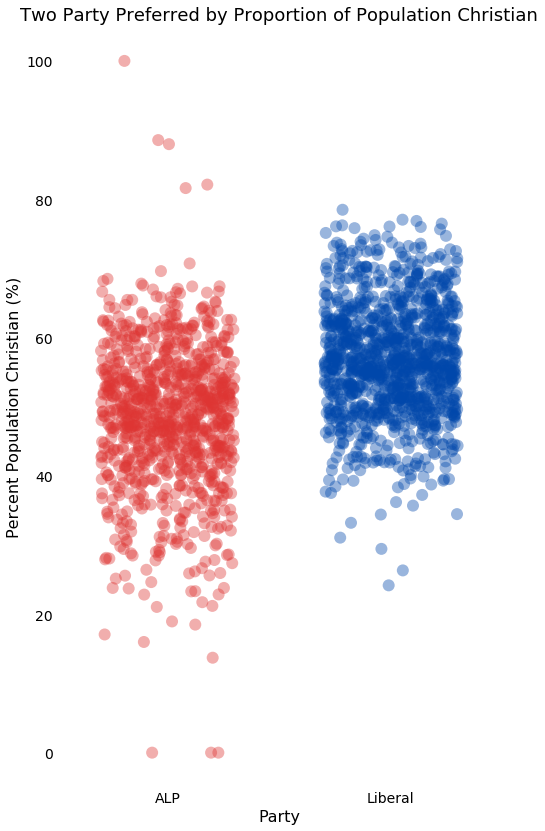

In [121]:
colours = [u"#DE3533", u"#0047AB"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,14))

parties = pdf["Preferred Party"].values
christians = pdf["christianity_tot_percent"].values*100
state = pdf["STE_NAME16"].values

sns.stripplot(parties, christians, jitter = 0.3, size = 12, edgecolor = 'none', alpha = 0.4, palette = colours)
#axes.plot(df.groupby("Preferred Party").median()["christianity_tot_percent"]*100, "_k", ms = 80)

# Add Title
axes.set_title("Two Party Preferred by Proportion of Population Christian", fontsize = 18, ha = "center")

# Set label axis
axes.set_xlabel("Party", fontsize = 16)
axes.set_ylabel("Percent Population Christian (%)", fontsize = 16)

# Remove tick marks
axes.tick_params(axis = "x", length = 0, labelsize = 14)
axes.tick_params(axis = "y", length = 0, labelsize = 14)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

In [100]:
fig.savefig("tpp_christians.png", dpi = 300, bbox_inches = "tight")

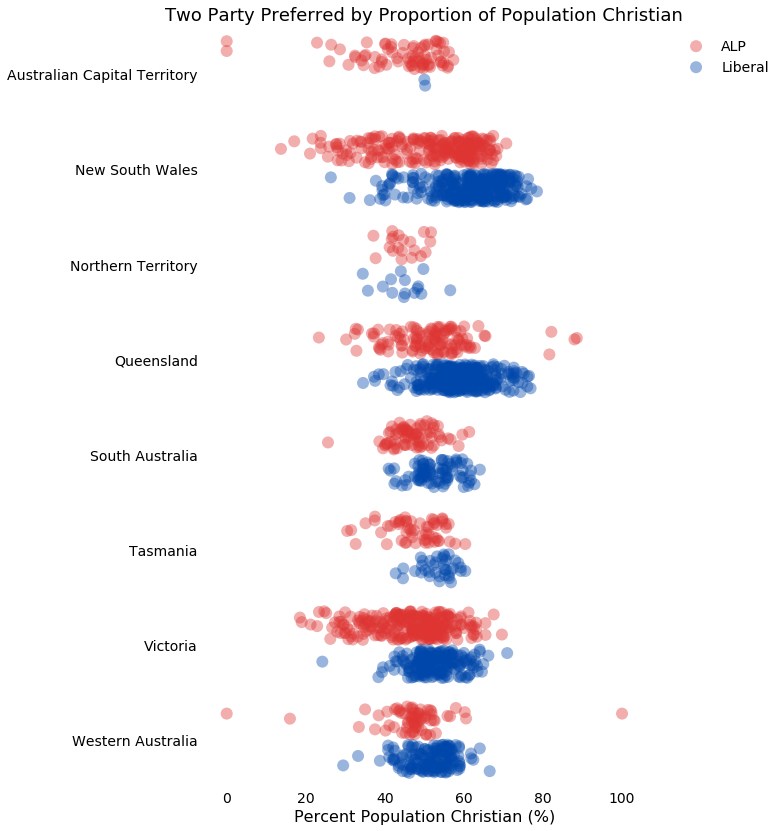

In [126]:
colours = [u"#DE3533", u"#0047AB"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,14))

parties = pdf["Preferred Party"].values
christians = pdf["christianity_tot_percent"].values*100
states = pdf["STE_NAME16"].values

sns.stripplot(christians, states, hue = parties
              ,jitter = 0.3, size = 12, edgecolor = 'none'
              ,alpha = 0.4, palette = colours, dodge = True)
#axes.plot(df.groupby("Preferred Party").median()["christianity_tot_percent"]*100, "_k", ms = 80)

# Add Title
axes.set_title("Two Party Preferred by Proportion of Population Christian", fontsize = 18, ha = "center")

# Set label axis
axes.set_xlabel("Percent Population Christian (%)", fontsize = 16)

# Remove tick marks
axes.tick_params(axis = "x", length = 0, labelsize = 14)
axes.tick_params(axis = "y", length = 0, labelsize = 14)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("ALP", "Liberal"), fontsize = 14, frameon = False, bbox_to_anchor = (1.3, 1))

In [124]:
fig.savefig("tpp_christians_by_state.png", dpi = 300, bbox_inches = "tight")